# <b><span style='color:#F1A424'>AutoML - Regression - House Price Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    


The housing price dataset contains range of features associated with residential properties, including their physical attributes, amenities, and location-related characteristics. It is a common type of dataset used for regression or predictive modeling tasks in the field of real estate or housing market analysis. 

Here are some key details about the Housing dataset:

**Features**:

- `sn`: Serial number or identifier for each housing entry.
- `lotsize`: The size of the lot or land associated with the property, typically measured in square feet.
- `bedrooms`: The number of bedrooms in the house, indicating the sleeping spaces.
- `bathrms`: The number of bathrooms in the house, reflecting the sanitary facilities available.
- `stories`: The number of stories or levels in the house, indicating its vertical structure.
- `driveway`: A binary variable indicating the presence or absence of a driveway for vehicular access.
- `recroom`: A binary variable indicating whether the house has a recreation room.
- `fullbase`: A binary variable indicating the presence or absence of a full basement in the house.
- `gashw`: A binary variable indicating whether the house has a gas hot water heating system.
- `airco`: A binary variable indicating the presence or absence of air conditioning in the house.
- `garagepl`: The number of parking spaces available in the garage.
- `prefarea`: A binary variable indicating whether the house is located in a preferred or desirable area.
- `homestyle`: A categorical variable representing the style or type of the house.

**Target Variable**:

- `price`: The price of the house, representing the cost or value of the property.
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict prices of residential property based on various features. 

**Challenges**:

- Potential challenges in working with this dataset may include handling missing or skewed data.
- Managing categorical variables like 'homestyle' and addressing the complexities associated with predicting housing prices.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'bedrooms' feature to get 2 different levels i.e., 'small_house' and 'big_house' based on values.
- Customized ordinal encoding on 'homestyle' and target encoding on 'prefarea'.
- Deletion of id column 'sn' using antiselect.
- Train test split with training size 0.75.
- Outlier filteration with 'percentile' method and customized lower-upper bound.
- Feature scaling with 'std' method.
- Addition of customized value in hyperparameter 'min_node_size' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("decisionforestpredict", ["housing_train", "housing_test"])

In [5]:
# Fetching in teradata dataframe
housing_train = DataFrame.from_table("housing_train")
housing_test = DataFrame.from_table("housing_test")

In [6]:
# Housing train dataset
housing_train.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
3,49500.0,3060.0,3,1,1,yes,no,no,no,no,0,no,Classic
5,61000.0,6360.0,2,1,1,yes,no,no,no,no,0,no,Eclectic
6,66000.0,4160.0,3,1,1,yes,yes,yes,no,yes,0,no,Eclectic
7,66000.0,3880.0,3,2,2,yes,no,yes,no,no,2,no,Eclectic
9,83800.0,4800.0,3,1,1,yes,yes,yes,no,no,0,no,Eclectic
10,88500.0,5500.0,3,2,4,yes,yes,no,no,yes,1,no,Eclectic
8,69000.0,4160.0,3,1,3,yes,no,no,no,no,0,no,Eclectic
4,60500.0,6650.0,3,1,2,yes,yes,no,no,no,0,no,Eclectic
2,38500.0,4000.0,2,1,1,yes,no,no,no,no,0,no,Classic
1,42000.0,5850.0,3,1,2,yes,no,yes,no,no,1,no,Classic


In [7]:
# Housing train dataset shape
housing_train.shape

(492, 14)

In [8]:
# Housing test dataset
housing_test.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
25,42000.0,4960.0,2,1,1,yes,no,no,no,no,0,no,Classic
53,68000.0,9166.0,2,1,1,yes,no,yes,no,yes,2,no,Eclectic
111,43000.0,5076.0,3,1,1,no,no,no,no,no,0,no,Classic
117,93000.0,3760.0,3,1,2,yes,no,no,yes,no,2,no,Eclectic
140,43000.0,3750.0,3,1,2,yes,no,no,no,no,0,no,Classic
142,40000.0,2650.0,3,1,2,yes,no,yes,no,no,1,no,Classic
132,44500.0,3850.0,3,1,2,yes,no,no,no,no,0,no,Classic
38,67000.0,5170.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
16,37900.0,3185.0,2,1,1,yes,no,no,no,yes,0,no,Classic
13,27000.0,1700.0,3,1,2,yes,no,no,no,no,0,no,Classic


In [9]:
# Housing test dataset shape
housing_test.shape

(46, 14)

In [8]:
AutoML.generate_custom_config("custom_housing")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  1

Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Feat

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [10]:
# Creating AutoML instance with task type 'Regression'.
# Excluding 'glm', 'svm', and 'knn' models from default model list for training.
# Keeping early stopping metrics threshold to 0.6 for 'R2', early stopping timer threshold to 200 sec
# Using verbose level 2 for detailed loggging
# Passing custom json file to provide customized value for AutoML.

aml = AutoML(task_type="Regression",
             exclude=['glm','svm','knn'],
             verbose=2,
             max_runtime_secs=200,
             stopping_metric='R2',
             stopping_tolerance=0.6,
             custom_config_file='custom_housing.json')


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "bedrooms": {
            "Type": "Variable-Width",
            "NumOfBins": 2,
            "Bin_1": {
                "min_value": 0,
                "max_value": 2,
                "label": "small_house"
            },
            "Bin_2": {
                "min_value": 3,
                "max_value": 5,
                "label": "big_house"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncodingList": [
            "homestyle"
        ],
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "prefarea": {
                "encoder_method": "CBM_GAUSSIAN_INVERSE_GAMMA",
                "response_column": "price"
            }
        }
    },
    "AntiselectIndicator": true,
    "AntiselectParam": [
        "sn"
    ],
    "TrainTestSpli

Feature Exploration started ...

Data Overview:
Total Rows in the data: 492
Total Columns in the data: 14

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
stories,INTEGER,492,0,None,0,492,0,0.0,100.0
bathrms,INTEGER,492,0,None,0,492,0,0.0,100.0
recroom,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
gashw,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
homestyle,VARCHAR(20) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
prefarea,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
driveway,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
bedrooms,INTEGER,492,0,None,0,492,0,0.0,100.0
sn,INTEGER,492,0,None,0,492,0,0.0,100.0
airco,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,sn,price,lotsize,bedrooms,bathrms,stories,garagepl
min,1,25000,1650,1,1,1,0
std,159.501,26472.496,2182.443,0.731,0.51,0.861,0.854
25%,132.5,49975,3600,2,1,1,0
50%,274,62000,4616,3,1,2,0
75%,413.25,82000,6370,3,2,2,1
max,546,190000,16200,6,4,4,3
mean,272.943,68100.396,5181.795,2.965,1.293,1.803,0.685
count,492,492,492,492,492,492,492



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
driveway                  2         
recroom                   2         
fullbase                  2         
gashw                     2         
airco                     2         
prefarea                  2         
homestyle                 3         

No Futile columns found.

Target Column Distribution:


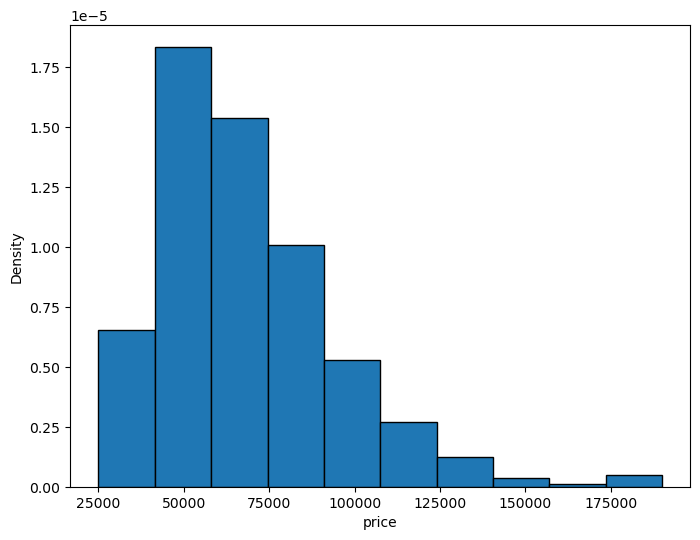

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    lotsize           2.235772
1    bathrms           0.203252
2   bedrooms           2.235772
3    stories           7.113821
4      price           2.439024
5   garagepl           2.235772


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,bedrooms,0,2,small_house
1,bedrooms,3,5,big_house


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266262762962"' - 4/20


fullbase,bathrms,stories,airco,prefarea,homestyle,id,price,recroom,gashw,garagepl,driveway,sn,lotsize,bedrooms
yes,2,1,no,no,Classic,248,45000.0,yes,no,1,no,20,3986.0,small_house
yes,2,2,yes,yes,bungalow,328,130000.0,yes,no,1,yes,361,6600.0,big_house  
yes,1,1,no,no,Classic,352,32500.0,no,no,0,no,73,1836.0,small_house
yes,1,1,no,yes,Eclectic,360,82900.0,no,no,2,yes,399,7000.0,big_house  
yes,1,1,no,yes,Eclectic,440,72000.0,yes,no,0,yes,395,6600.0,big_house  
yes,1,2,no,no,Classic,448,48000.0,no,no,0,no,170,3100.0,big_house  
no,1,2,no,no,Classic,32,46000.0,no,no,0,no,221,3120.0,big_house  
no,2,4,yes,no,bungalow,48,120000.0,no,no,2,yes,526,7475.0,big_house  
no,1,2,no,no,Classic,56,47000.0,no,no,0,yes,219,3792.0,big_house  
no,1,1,no,no,Classic,64,36000.0,no,no,0,no,76,3180.0,big_house  


Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 25% - 5/20


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264955938884"' - 6/20


fullbase,driveway,bathrms,stories,prefarea,airco,id,bedrooms,price,recroom,garagepl,gashw,sn,lotsize,homestyle
yes,no,1,1,no,no,352,small_house,32500.0,no,0,no,73,1836.0,1
yes,yes,1,1,yes,no,440,big_house  ,72000.0,yes,0,no,395,6600.0,2
yes,no,1,2,no,no,448,big_house  ,48000.0,no,0,no,170,3100.0,1
yes,no,1,2,no,yes,488,big_house  ,57250.0,no,0,no,145,4500.0,2
yes,yes,1,2,yes,no,37,big_house  ,104900.0,no,1,no,446,11440.0,0
yes,yes,1,1,yes,yes,77,big_house  ,76000.0,no,2,no,402,7800.0,2
no,yes,1,2,no,no,56,big_house  ,47000.0,no,0,no,219,3792.0,1
no,yes,2,4,no,no,80,big_house  ,110000.0,no,2,no,524,6000.0,0
no,yes,2,4,yes,yes,88,big_house  ,103500.0,yes,1,no,381,9000.0,0
no,yes,1,1,yes,yes,96,small_house,68000.0,no,2,no,421,10240.0,2


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269101915295"' - 6/20


prefarea,fullbase,bathrms,stories,airco,id,bedrooms,homestyle,price,recroom,gashw,garagepl,driveway,sn,lotsize
83851.72413793103,yes,1,1,yes,77,big_house  ,2,76000.0,no,no,2,yes,402,7800.0
83851.72413793103,yes,2,1,no,46,big_house  ,2,86000.0,yes,no,0,yes,406,6900.0
83851.72413793103,yes,1,2,yes,110,big_house  ,2,85000.0,yes,no,0,yes,400,7231.0
83851.72413793103,yes,1,1,yes,238,big_house  ,2,58550.0,no,no,0,yes,430,3600.0
83851.72413793103,yes,1,1,no,414,small_house,2,91700.0,yes,no,2,yes,418,6750.0
83851.72413793103,yes,1,3,no,454,big_house  ,2,93000.0,no,no,0,yes,475,6670.0
62906.33597883598,yes,1,2,no,448,big_house  ,1,48000.0,no,no,0,no,170,3100.0
62906.33597883598,yes,1,1,yes,85,big_house  ,0,123500.0,yes,no,1,yes,95,8050.0
62906.33597883598,yes,1,1,no,149,small_house,2,52500.0,no,no,0,yes,171,3630.0
62906.33597883598,yes,1,1,no,165,big_house  ,2,60000.0,no,no,0,yes,497,4500.0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266669019186"' - 6/20


['fullbase', 'airco', 'bedrooms', 'recroom', 'gashw', 'driveway']


prefarea,fullbase_0,fullbase_1,bathrms,stories,airco_0,airco_1,id,bedrooms_0,bedrooms_1,bedrooms_2,homestyle,price,recroom_0,recroom_1,gashw_0,gashw_1,garagepl,driveway_0,driveway_1,sn,lotsize
62906.33597883598,0,1,2,1,1,0,317,1,0,0,2,76900.0,0,1,0,1,0,0,1,315,6450.0
62906.33597883598,0,1,2,2,1,0,373,1,0,0,2,60000.0,1,0,1,0,0,0,1,271,3640.0
62906.33597883598,0,1,1,2,1,0,397,1,0,0,1,45000.0,1,0,1,0,0,0,1,250,3450.0
62906.33597883598,0,1,3,2,1,0,118,1,0,0,2,71000.0,1,0,1,0,2,0,1,257,4410.0
62906.33597883598,0,1,2,2,0,1,246,1,0,0,2,70800.0,1,0,1,0,1,1,0,226,2800.0
62906.33597883598,0,1,2,1,1,0,326,1,0,0,2,56000.0,0,1,1,0,3,0,1,58,7260.0
83851.72413793103,0,1,1,1,0,1,77,1,0,0,2,76000.0,1,0,1,0,2,0,1,402,7800.0
83851.72413793103,0,1,2,1,1,0,46,1,0,0,2,86000.0,0,1,1,0,0,0,1,406,6900.0
83851.72413793103,0,1,1,2,0,1,110,1,0,0,2,85000.0,0,1,1,0,0,0,1,400,7231.0
83851.72413793103,0,1,1,1,0,1,238,1,0,0,2,58550.0,1,0,1,0,0,0,1,430,3600.0


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


prefarea,fullbase_0,fullbase_1,bathrms,stories,airco_0,airco_1,id,bedrooms_0,bedrooms_1,bedrooms_2,homestyle,price,recroom_0,recroom_1,gashw_0,gashw_1,garagepl,driveway_0,driveway_1,lotsize
83851.72413793103,0,1,1,2,0,1,110,1,0,0,2,85000.0,0,1,1,0,0,0,1,7231.0
83851.72413793103,0,1,1,1,1,0,414,0,0,1,2,91700.0,0,1,1,0,2,0,1,6750.0
83851.72413793103,0,1,1,3,1,0,454,1,0,0,2,93000.0,1,0,1,0,0,0,1,6670.0
83851.72413793103,0,1,2,1,1,0,518,1,0,0,2,79000.0,1,0,1,0,2,0,1,6100.0
83851.72413793103,0,1,1,2,1,0,90,1,0,0,1,47600.0,1,0,1,0,0,0,1,2145.0
83851.72413793103,0,1,2,2,1,0,114,1,0,0,2,80750.0,0,1,1,0,1,0,1,6660.0
62906.33597883598,0,1,1,1,1,0,149,0,0,1,2,52500.0,1,0,1,0,0,0,1,3630.0
62906.33597883598,0,1,1,2,1,0,237,1,0,0,2,66500.0,1,0,1,0,0,0,1,3745.0
62906.33597883598,0,1,2,1,1,0,317,1,0,0,2,76900.0,0,1,0,1,0,0,1,6450.0
62906.33597883598,0,1,2,1,0,1,357,1,0,0,2,78000.0,0,1,1,0,0,0,1,3150.0


Training size : 0.75                                                                      
Testing size  : 0.25                                                                      


prefarea,fullbase_0,fullbase_1,bathrms,stories,airco_0,airco_1,id,bedrooms_0,bedrooms_1,bedrooms_2,homestyle,price,recroom_0,recroom_1,gashw_0,gashw_1,garagepl,driveway_0,driveway_1,lotsize
62906.33597883598,0,1,1,1,0,1,12,0,0,1,2,63900.0,1,0,1,0,1,0,1,6360.0
62906.33597883598,1,0,1,3,0,1,16,1,0,0,2,87000.0,1,0,1,0,2,0,1,8372.0
62906.33597883598,0,1,2,2,0,1,17,1,0,0,2,57000.0,1,0,1,0,0,1,0,4500.0
62906.33597883598,0,1,1,2,0,1,18,1,0,0,0,116000.0,0,1,1,0,1,0,1,6840.0
62906.33597883598,1,0,1,1,1,0,21,1,0,0,2,60000.0,1,0,0,1,2,0,1,5800.0
62906.33597883598,1,0,1,1,1,0,22,0,0,1,1,27000.0,1,0,1,0,0,0,1,3649.0
83851.72413793103,1,0,1,1,1,0,15,0,0,1,1,49500.0,1,0,1,0,1,0,1,5320.0
83851.72413793103,0,1,2,2,1,0,29,1,0,0,2,78000.0,0,1,1,0,0,0,1,6600.0
83851.72413793103,0,1,1,2,1,0,37,1,0,0,0,104900.0,1,0,1,0,1,0,1,11440.0
83851.72413793103,1,0,1,3,1,0,41,1,0,0,2,80000.0,1,0,1,0,0,0,1,6360.0


prefarea,fullbase_0,fullbase_1,bathrms,stories,airco_0,airco_1,id,bedrooms_0,bedrooms_1,bedrooms_2,homestyle,price,recroom_0,recroom_1,gashw_0,gashw_1,garagepl,driveway_0,driveway_1,lotsize
62906.33597883598,0,1,2,2,0,1,13,1,0,0,2,99000.0,1,0,1,0,1,0,1,8880.0
62906.33597883598,1,0,1,1,1,0,34,1,0,0,1,25245.0,1,0,1,0,0,1,0,2400.0
62906.33597883598,1,0,2,2,1,0,36,1,0,0,2,75000.0,0,1,1,0,2,0,1,9800.0
62906.33597883598,1,0,1,2,1,0,38,1,0,0,2,56000.0,1,0,1,0,0,0,1,3000.0
62906.33597883598,1,0,1,2,1,0,67,0,0,1,2,58500.0,1,0,1,0,1,0,1,4040.0
62906.33597883598,1,0,1,3,1,0,72,1,0,0,2,70000.0,1,0,1,0,0,0,1,2970.0
83851.72413793103,1,0,1,3,1,0,19,1,0,0,2,83900.0,1,0,1,0,2,0,1,11460.0
83851.72413793103,0,1,2,2,0,1,27,1,0,0,0,120000.0,1,0,1,0,1,0,1,5500.0
83851.72413793103,1,0,2,2,0,1,40,1,0,0,0,118500.0,1,0,1,0,1,0,1,4880.0
83851.72413793103,1,0,1,3,1,0,75,1,0,0,1,49500.0,1,0,1,0,0,0,1,2145.0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0      price           8.739837
1   garagepl           2.235772
2         id           9.756098
3    bathrms           2.235772
4    lotsize           9.552846
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719272492498293"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265839503514"' - 12/20
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265844916315"'


['gashw_1', 'airco_0', 'stories', 'bathrms', 'fullbase_1', 'recroom_1', 'recroom_0', 'fullbase_0', 'homestyle', 'bedrooms_0', 'driveway_1', 'airco_1', 'driveway_0', 'garagepl', 'gashw_0', 'bedrooms_2', 'prefarea', 'lotsize']


['stories', 'bathrms', 'homestyle', 'garagepl', 'prefarea', 'lotsize']


gashw_1,airco_0,recroom_1,fullbase_0,id,bedrooms_0,driveway_1,price,fullbase_1,airco_1,driveway_0,recroom_0,gashw_0,bedrooms_2,stories,bathrms,homestyle,garagepl,prefarea,lotsize
0,0,0,0,12,0,1,63900.0,1,1,0,1,1,1,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,0.3943732959927246,-0.5526794237661657,0.573036461149021
0,1,0,1,15,0,1,49500.0,0,0,0,1,1,1,-0.8999912756370625,-0.5698449326198072,-0.7516329215933887,0.3943732959927246,1.8093671611394049,0.08218726554340369
0,0,0,1,16,1,1,87000.0,0,1,0,1,1,0,1.4078434954608336,-0.5698449326198072,0.7474571831400921,1.5644560502190727,-0.5526794237661657,1.5226408664937343
0,0,0,0,17,1,0,57000.0,1,1,1,1,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.3048284463764099
0,0,0,1,20,1,1,88000.0,0,1,0,1,1,0,2.561760881009782,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.3048284463764099
1,1,0,1,21,1,1,60000.0,0,0,0,1,0,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,1.5644560502190727,-0.5526794237661657,0.30873304813061164
0,0,1,0,18,1,1,116000.0,1,1,0,0,1,0,0.2539261099118855,-0.5698449326198072,-2.2507230263268694,0.3943732959927246,-0.5526794237661657,0.7995822437362289
0,1,0,1,14,0,1,48000.0,0,0,0,1,1,1,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-0.4841771909246162
0,1,0,1,11,1,1,80000.0,0,0,0,1,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,0.3943732959927246,-0.5526794237661657,2.5269938359636894
0,1,0,1,8,1,1,58000.0,0,0,0,1,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.38034370723881256


gashw_1,airco_0,recroom_1,fullbase_0,id,bedrooms_0,driveway_1,price,fullbase_1,airco_1,driveway_0,recroom_0,gashw_0,bedrooms_2,stories,bathrms,homestyle,garagepl,prefarea,lotsize
1,1,0,0,566,1,1,125000.0,1,0,0,1,0,0,0.2539261099118855,-0.5698449326198072,-2.2507230263268694,1.5644560502190727,-0.5526794237661657,-0.3897831148466129
1,1,1,0,494,1,1,71000.0,1,0,0,0,0,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,1.1988691855461828
0,1,0,1,38,1,1,56000.0,0,0,0,1,1,0,0.2539261099118855,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-1.0127840169614348
1,1,0,1,192,1,1,62000.0,0,0,0,1,0,0,1.4078434954608336,1.7548633720450872,0.7474571831400921,0.3943732959927246,-0.5526794237661657,-0.3048284463764099
1,1,0,0,24,0,1,99000.0,1,0,0,1,0,1,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,0.3943732959927246,-0.5526794237661657,3.8013138630167345
0,1,0,1,72,1,1,70000.0,0,0,0,1,1,0,1.4078434954608336,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-1.0269431283731352
0,0,0,0,47,1,0,74500.0,1,1,1,1,1,0,-0.8999912756370625,1.7548633720450872,0.7474571831400921,1.5644560502190727,-0.5526794237661657,-0.3048284463764099
0,1,1,1,36,1,1,75000.0,0,0,0,0,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,1.5644560502190727,-0.5526794237661657,2.196614569690678
0,0,0,0,13,1,1,99000.0,1,1,0,1,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,0.3943732959927246,-0.5526794237661657,1.7624018197318627
1,1,0,0,425,1,1,120000.0,1,0,0,1,0,0,0.2539261099118855,1.7548633720450872,-2.2507230263268694,1.5644560502190727,-0.5526794237661657,1.3234693659691472


['gashw_1', 'airco_0', 'stories', 'bathrms', 'fullbase_1', 'recroom_1', 'recroom_0', 'fullbase_0', 'homestyle', 'bedrooms_0', 'airco_1', 'driveway_0', 'garagepl', 'gashw_0', 'bedrooms_2', 'prefarea', 'lotsize']


['r_stories', 'r_bathrms', 'r_homestyle', 'r_garagepl', 'r_prefarea', 'r_lotsize']


r_gashw_1,id,r_fullbase_1,r_bedrooms_2,r_gashw_0,price,r_driveway_0,r_airco_0,r_fullbase_0,r_airco_1,r_bedrooms_0,r_recroom_0,r_recroom_1,r_stories,r_bathrms,r_homestyle,r_garagepl,r_prefarea,r_lotsize
0,12,1,1,1,63900.0,0,0,0,1,0,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,0.3943732959927246,-0.5526794237661657,0.573036461149021
0,15,0,1,1,49500.0,0,1,1,0,0,1,0,-0.8999912756370625,-0.5698449326198072,-0.7516329215933887,0.3943732959927246,1.8093671611394049,0.08218726554340369
0,16,0,0,1,87000.0,0,0,1,1,1,1,0,1.4078434954608336,-0.5698449326198072,0.7474571831400921,1.5644560502190727,-0.5526794237661657,1.5226408664937343
0,17,1,0,1,57000.0,1,0,0,1,1,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.3048284463764099
0,20,0,0,1,88000.0,0,0,1,1,1,1,0,2.561760881009782,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.3048284463764099
1,21,0,0,0,60000.0,0,1,1,0,1,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,1.5644560502190727,-0.5526794237661657,0.30873304813061164
0,18,1,0,1,116000.0,0,0,0,1,1,0,1,0.2539261099118855,-0.5698449326198072,-2.2507230263268694,0.3943732959927246,-0.5526794237661657,0.7995822437362289
0,14,0,1,1,48000.0,0,1,1,0,0,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-0.4841771909246162
0,11,0,0,1,80000.0,0,1,1,0,1,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,0.3943732959927246,-0.5526794237661657,2.5269938359636894
0,8,0,0,1,58000.0,0,1,1,0,1,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.38034370723881256


r_gashw_1,id,r_fullbase_1,r_bedrooms_2,r_gashw_0,price,r_driveway_0,r_airco_0,r_fullbase_0,r_airco_1,r_bedrooms_0,r_recroom_0,r_recroom_1,r_stories,r_bathrms,r_homestyle,r_garagepl,r_prefarea,r_lotsize
1,566,1,0,0,125000.0,0,1,0,0,1,1,0,0.2539261099118855,-0.5698449326198072,-2.2507230263268694,1.5644560502190727,-0.5526794237661657,-0.3897831148466129
1,494,1,0,0,71000.0,0,1,0,0,1,0,1,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,1.1988691855461828
0,38,0,0,1,56000.0,0,1,1,0,1,1,0,0.2539261099118855,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-1.0127840169614348
1,192,0,0,0,62000.0,0,1,1,0,1,1,0,1.4078434954608336,1.7548633720450872,0.7474571831400921,0.3943732959927246,-0.5526794237661657,-0.3048284463764099
1,24,1,1,0,99000.0,0,1,0,0,0,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,0.3943732959927246,-0.5526794237661657,3.8013138630167345
0,72,0,0,1,70000.0,0,1,1,0,1,1,0,1.4078434954608336,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-1.0269431283731352
0,47,1,0,1,74500.0,1,0,0,1,1,1,0,-0.8999912756370625,1.7548633720450872,0.7474571831400921,1.5644560502190727,-0.5526794237661657,-0.3048284463764099
0,36,0,0,1,75000.0,0,1,1,0,1,0,1,0.2539261099118855,1.7548633720450872,0.7474571831400921,1.5644560502190727,-0.5526794237661657,2.196614569690678
0,13,1,0,1,99000.0,0,0,0,1,1,1,0,0.2539261099118855,1.7548633720450872,0.7474571831400921,0.3943732959927246,-0.5526794237661657,1.7624018197318627
1,425,1,0,0,120000.0,0,1,0,0,1,1,0,0.2539261099118855,1.7548633720450872,-2.2507230263268694,1.5644560502190727,-0.5526794237661657,1.3234693659691472


['prefarea', 'bathrms', 'stories', 'homestyle', 'garagepl', 'lotsize']


gashw_1,airco_0,recroom_1,fullbase_0,bedrooms_1,id,bedrooms_0,driveway_1,price,fullbase_1,airco_1,driveway_0,recroom_0,gashw_0,bedrooms_2,prefarea,bathrms,stories,homestyle,garagepl,lotsize
0,1,0,1,0,44,1,1,65500.0,0,0,0,1,1,0,1.8093671611393762,-0.5698449326198075,0.2539261099118857,0.7474571831400939,0.39437329599272386,-0.6163288974338209
0,1,0,1,0,54,1,1,54000.0,0,0,0,1,1,0,1.8093671611393762,-0.5698449326198075,1.4078434954608345,0.7474571831400939,-0.7757094582336221,-1.0807477517375974
0,1,0,0,0,58,1,1,61100.0,1,0,0,1,1,0,1.8093671611393762,-0.5698449326198075,0.2539261099118857,0.7474571831400939,1.5644560502190699,-0.8239958648054283
0,1,0,1,0,61,0,1,51500.0,0,0,0,1,1,1,1.8093671611393762,-0.5698449326198075,-0.8999912756370632,0.7474571831400939,-0.7757094582336221,-0.5408136365714183
0,0,1,0,0,81,1,1,95000.0,1,1,0,0,1,0,1.8093671611393762,-0.5698449326198075,-0.8999912756370632,0.7474571831400939,1.5644560502190699,0.26153601009161004
0,0,1,1,0,88,1,1,103500.0,0,1,0,0,1,0,1.8093671611393762,1.7548633720450884,2.5617608810097834,-2.2507230263268747,0.39437329599272386,1.8190382653786652
0,0,0,0,0,12,0,1,63900.0,1,1,0,1,1,1,-0.5526794237661955,-0.5698449326198075,-0.8999912756370632,0.7474571831400939,0.39437329599272386,0.5730364611490211
0,0,0,1,0,16,1,1,87000.0,0,1,0,1,1,0,-0.5526794237661955,-0.5698449326198075,1.4078434954608345,0.7474571831400939,1.5644560502190699,1.5226408664937345
0,0,0,0,0,17,1,0,57000.0,1,1,1,1,1,0,-0.5526794237661955,1.7548633720450884,0.2539261099118857,0.7474571831400939,-0.7757094582336221,-0.30482844637640993
0,0,1,0,0,18,1,1,116000.0,1,1,0,0,1,0,-0.5526794237661955,-0.5698449326198075,0.2539261099118857,-2.2507230263268747,0.39437329599272386,0.7995822437362291


gashw_1,airco_0,recroom_1,fullbase_0,bedrooms_1,id,bedrooms_0,driveway_1,price,fullbase_1,airco_1,driveway_0,recroom_0,gashw_0,bedrooms_2,prefarea,bathrms,stories,homestyle,garagepl,lotsize
0,0,0,0,0,13,1,1,99000.0,1,1,0,1,1,0,-0.5526794237661955,1.7548633720450884,0.2539261099118857,0.7474571831400939,0.39437329599272386,1.7624018197318632
0,1,0,1,0,34,1,0,25245.0,0,0,1,1,1,0,-0.5526794237661955,-0.5698449326198075,-0.8999912756370632,-0.7516329215933905,-0.7757094582336221,-1.295966245195445
0,1,1,1,0,36,1,1,75000.0,0,0,0,0,1,0,-0.5526794237661955,1.7548633720450884,0.2539261099118857,0.7474571831400939,1.5644560502190699,2.1966145696906785
0,1,0,1,0,38,1,1,56000.0,0,0,0,1,1,0,-0.5526794237661955,-0.5698449326198075,0.2539261099118857,0.7474571831400939,-0.7757094582336221,-1.012784016961435
0,1,0,1,0,67,0,1,58500.0,0,0,0,1,1,1,-0.5526794237661955,-0.5698449326198075,0.2539261099118857,0.7474571831400939,0.39437329599272386,-0.5219348213558176
0,1,0,1,0,72,1,1,70000.0,0,0,0,1,1,0,-0.5526794237661955,-0.5698449326198075,1.4078434954608345,0.7474571831400939,-0.7757094582336221,-1.0269431283731354
0,1,0,1,0,19,1,1,83900.0,0,0,0,1,1,0,1.8093671611393762,-0.5698449326198075,1.4078434954608345,0.7474571831400939,1.5644560502190699,2.980085401138106
0,0,0,0,0,27,1,1,120000.0,1,1,0,1,1,0,1.8093671611393762,1.7548633720450884,0.2539261099118857,-2.2507230263268747,0.39437329599272386,0.16714193401360672
0,0,0,1,0,40,1,1,118500.0,0,1,0,1,1,0,1.8093671611393762,1.7548633720450884,0.2539261099118857,-2.2507230263268747,0.39437329599272386,-0.12547970182820362
0,1,0,1,0,75,1,1,49500.0,0,0,0,1,1,0,1.8093671611393762,-0.5698449326198075,1.4078434954608345,-0.7516329215933905,-0.7757094582336221,-1.4163186921948991


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Completed customized hyperparameter update.


response_column : price                                                                                                                               
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : price
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
-------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265462876032"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265641125640"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266489863875"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719273332119506"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265877128844"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266296226970"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.828285
1,2,XGBOOST_0,lasso,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.826634
2,3,XGBOOST_3,lasso,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.826634
3,4,XGBOOST_2,pca,8751.601706,1.511462e+08,0.032593,12294.151900,0.180536,0.773576,0.753360
4,5,DECISIONFOREST_1,rfe,10298.840038,2.017385e+08,0.039428,14203.467740,0.198565,0.697787,0.648857
5,6,DECISIONFOREST_0,lasso,10298.840038,2.017385e+08,0.039428,14203.467740,0.198565,0.697787,0.645481
6,7,DECISIONFOREST_3,lasso,11573.319783,3.254868e+08,0.047169,18041.251531,0.217183,0.512406,0.428015
7,8,DECISIONFOREST_2,pca,11950.585694,3.405775e+08,0.059753,18454.741895,0.244444,0.489800,0.444246


In [11]:
# Fitting train data
aml.fit(housing_train,housing_train.price)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [12]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.828285
1,2,XGBOOST_0,lasso,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.826634
2,3,XGBOOST_3,lasso,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.826634
3,4,XGBOOST_2,pca,8751.601706,1.511462e+08,0.032593,12294.151900,0.180536,0.773576,0.753360
4,5,DECISIONFOREST_1,rfe,10298.840038,2.017385e+08,0.039428,14203.467740,0.198565,0.697787,0.648857
5,6,DECISIONFOREST_0,lasso,10298.840038,2.017385e+08,0.039428,14203.467740,0.198565,0.697787,0.645481
6,7,DECISIONFOREST_3,lasso,11573.319783,3.254868e+08,0.047169,18041.251531,0.217183,0.512406,0.428015
7,8,DECISIONFOREST_2,pca,11950.585694,3.405775e+08,0.059753,18454.741895,0.244444,0.489800,0.444246


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [13]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,7840.977952,9.865337e+07,0.024582,9932.440273,0.156786,0.852213,0.828285


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [18]:
# Generating prediction and metrics on test data
prediction = aml.predict(housing_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266421764212"'⫾⫾⫾｜ 33% - 5/15


fullbase,bathrms,stories,airco,prefarea,homestyle,id,price,recroom,gashw,garagepl,driveway,sn,lotsize,bedrooms
yes,1,1,no,yes,Eclectic,27,60500.0,no,no,0,yes,472,2787.0,big_house  
yes,1,1,no,yes,Eclectic,33,90000.0,no,no,1,yes,411,9000.0,big_house  
yes,1,2,no,no,Classic,41,40000.0,no,no,1,yes,142,2650.0,big_house  
yes,1,2,no,yes,Classic,13,49000.0,no,no,0,yes,463,2610.0,big_house  
yes,1,1,no,no,Classic,14,48500.0,no,no,2,yes,251,3450.0,big_house  
yes,1,3,no,yes,Eclectic,22,87500.0,no,no,0,yes,408,6420.0,big_house  
no,1,2,yes,yes,Eclectic,19,69000.0,no,no,2,yes,440,6862.0,big_house  
no,1,1,no,yes,Eclectic,51,65000.0,no,no,0,yes,443,3520.0,big_house  
no,1,1,no,no,Classic,59,33000.0,no,no,0,yes,195,3180.0,small_house
no,1,4,no,no,Eclectic,67,80000.0,no,no,0,yes,317,5000.0,big_house  


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267130152901"'⫾⫾⫾｜ 46% - 7/15
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269886537696"'


prefarea,fullbase,bathrms,stories,airco,id,bedrooms,homestyle,price,recroom,gashw,garagepl,driveway,sn,lotsize
62906.33597883598,yes,1,2,yes,31,big_house  ,2,60000.0,no,no,0,yes,157,2953.0
62906.33597883598,no,1,1,no,59,small_house,1,33000.0,no,no,0,yes,195,3180.0
62906.33597883598,no,1,4,yes,12,big_house  ,2,67000.0,no,no,0,yes,38,5170.0
62906.33597883598,no,1,2,no,20,big_house  ,1,40500.0,no,yes,1,no,198,4350.0
62906.33597883598,no,1,1,no,52,big_house  ,1,43000.0,no,no,0,no,111,5076.0
62906.33597883598,no,1,1,no,9,small_house,2,55000.0,no,no,0,yes,301,4080.0
83851.72413793103,yes,1,2,no,13,big_house  ,1,49000.0,no,no,0,yes,463,2610.0
83851.72413793103,yes,1,1,yes,40,big_house  ,2,92500.0,yes,no,2,yes,401,7410.0
83851.72413793103,yes,1,1,yes,32,big_house  ,2,77500.0,yes,no,0,yes,403,6825.0
83851.72413793103,no,1,1,no,21,big_house  ,1,44555.0,no,no,0,yes,459,2398.0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268342573457"'⫾⫾⫾｜ 46% - 7/15


prefarea,fullbase_0,fullbase_1,bathrms,stories,airco_0,airco_1,id,bedrooms_0,bedrooms_1,bedrooms_2,homestyle,price,recroom_0,recroom_1,gashw_0,gashw_1,garagepl,driveway_0,driveway_1,sn,lotsize
83851.72413793103,1,0,1,1,1,0,51,1,0,0,2,65000.0,1,0,1,0,0,0,1,443,3520.0
83851.72413793103,0,1,1,3,1,0,22,1,0,0,2,87500.0,1,0,1,0,0,0,1,408,6420.0
83851.72413793103,0,1,1,1,1,0,33,1,0,0,2,90000.0,1,0,1,0,1,0,1,411,9000.0
83851.72413793103,0,1,1,1,1,0,27,1,0,0,2,60500.0,1,0,1,0,0,0,1,472,2787.0
83851.72413793103,1,0,1,1,1,0,21,1,0,0,1,44555.0,1,0,1,0,0,0,1,459,2398.0
83851.72413793103,0,1,1,1,0,1,40,1,0,0,2,92500.0,0,1,1,0,2,0,1,401,7410.0
62906.33597883598,0,1,1,2,0,1,31,1,0,0,2,60000.0,1,0,1,0,0,0,1,157,2953.0
62906.33597883598,1,0,1,1,1,0,59,0,0,1,1,33000.0,1,0,1,0,0,0,1,195,3180.0
62906.33597883598,1,0,1,4,0,1,12,1,0,0,2,67000.0,1,0,1,0,0,0,1,38,5170.0
62906.33597883598,1,0,1,2,1,0,20,1,0,0,1,40500.0,1,0,0,1,1,1,0,198,4350.0


prefarea,fullbase_0,fullbase_1,bathrms,stories,airco_0,airco_1,id,bedrooms_0,bedrooms_1,bedrooms_2,homestyle,price,recroom_0,recroom_1,gashw_0,gashw_1,garagepl,driveway_0,driveway_1,lotsize
62906.33597883598,1,0,1,4,0,1,12,1,0,0,2,67000.0,1,0,1,0,0,0,1,5170.0
62906.33597883598,1,0,1,1,1,0,52,1,0,0,1,43000.0,1,0,1,0,0,1,0,5076.0
62906.33597883598,1,0,1,1,1,0,9,0,0,1,2,55000.0,1,0,1,0,0,0,1,4080.0
62906.33597883598,1,0,1,2,1,0,17,1,0,0,1,27000.0,1,0,1,0,0,0,1,1700.0
62906.33597883598,1,0,1,1,0,1,29,0,0,1,2,64000.0,1,0,1,0,1,0,1,5885.0
62906.33597883598,1,0,1,2,1,0,45,1,0,0,2,62500.0,1,0,1,0,0,0,1,3900.0
83851.72413793103,0,1,1,1,0,1,32,1,0,0,2,77500.0,0,1,1,0,0,0,1,6825.0
83851.72413793103,1,0,1,2,1,0,8,0,0,1,2,55000.0,0,1,1,0,0,0,1,2176.0
83851.72413793103,1,0,1,1,1,0,51,1,0,0,2,65000.0,1,0,1,0,0,0,1,3520.0
83851.72413793103,1,0,1,2,0,1,19,1,0,0,2,69000.0,1,0,1,0,2,0,1,6862.0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266863255681"'⫾⫾⫾｜ 73% - 11/15


id,gashw_1,airco_0,stories,bathrms,fullbase_1,recroom_1,recroom_0,fullbase_0,homestyle,bedrooms_0,driveway_1,airco_1,driveway_0,garagepl,gashw_0,bedrooms_2,prefarea,lotsize,price
20,1,1,2,1,0,0,1,1,1,1,0,0,1,1,0,0,62906.336,4350.0,40500.0
9,0,1,1,1,0,0,1,1,2,0,1,0,0,0,1,1,62906.336,4080.0,55000.0
17,0,1,2,1,0,0,1,1,1,1,1,0,0,0,1,0,62906.336,1700.0,27000.0
29,0,0,1,1,0,0,1,1,2,0,1,1,0,1,1,1,62906.336,5885.0,64000.0
69,0,1,1,1,0,0,1,1,2,1,1,0,0,2,1,0,62906.336,7980.0,78500.0
15,0,1,2,1,0,0,1,1,2,1,1,0,0,0,1,0,62906.336,4360.0,61000.0
23,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,1,62906.336,3185.0,37900.0
47,0,1,2,1,0,0,1,1,1,1,1,0,0,0,1,0,62906.336,3850.0,44500.0
10,0,1,1,1,0,0,1,1,1,0,1,0,0,0,1,1,62906.336,6000.0,41000.0
53,0,1,2,1,0,0,1,1,1,1,1,0,0,3,1,0,62906.336,3630.0,43000.0


gashw_1,airco_0,recroom_1,fullbase_0,id,bedrooms_0,driveway_1,price,fullbase_1,airco_1,driveway_0,recroom_0,gashw_0,bedrooms_2,stories,bathrms,homestyle,garagepl,prefarea,lotsize
1,1,0,1,20,1,0,40500.0,0,0,1,1,0,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,0.3943732959927246,-0.5526794237661657,-0.37562400343491237
0,1,0,1,9,0,1,55000.0,0,0,0,1,1,1,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.5030560061402168
0,1,0,1,17,1,1,27000.0,0,0,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-1.6263455114684564
0,0,0,1,29,0,1,64000.0,0,1,0,1,1,1,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,0.3943732959927246,-0.5526794237661657,0.3488505304637631
0,1,0,1,69,1,1,78500.0,0,0,0,1,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,1.5644560502190727,-0.5526794237661657,1.3376284773808478
0,1,0,1,15,1,1,61000.0,0,0,0,1,1,0,0.2539261099118855,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.37090429963101224
0,0,0,1,23,0,1,37900.0,0,1,0,1,1,1,-0.8999912756370625,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-0.9254694965892817
0,1,0,1,47,1,1,44500.0,0,0,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-0.6116091936299207
0,1,0,1,10,0,1,41000.0,0,0,0,1,1,1,-0.8999912756370625,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,0.40312712420861496
0,1,0,1,53,1,1,43000.0,0,0,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,2.734538804445421,-0.5526794237661657,-0.7154426773157243


id,gashw_1,airco_0,stories,bathrms,fullbase_1,recroom_1,recroom_0,fullbase_0,homestyle,bedrooms_0,airco_1,driveway_0,garagepl,gashw_0,bedrooms_2,prefarea,lotsize,price
20,1,1,2,1,0,0,1,1,1,1,0,1,1,0,0,62906.336,4350.0,40500.0
9,0,1,1,1,0,0,1,1,2,0,0,0,0,1,1,62906.336,4080.0,55000.0
17,0,1,2,1,0,0,1,1,1,1,0,0,0,1,0,62906.336,1700.0,27000.0
29,0,0,1,1,0,0,1,1,2,0,1,0,1,1,1,62906.336,5885.0,64000.0
69,0,1,1,1,0,0,1,1,2,1,0,0,2,1,0,62906.336,7980.0,78500.0
15,0,1,2,1,0,0,1,1,2,1,0,0,0,1,0,62906.336,4360.0,61000.0
23,0,0,1,1,0,0,1,1,1,0,1,0,0,1,1,62906.336,3185.0,37900.0
47,0,1,2,1,0,0,1,1,1,1,0,0,0,1,0,62906.336,3850.0,44500.0
10,0,1,1,1,0,0,1,1,1,0,0,0,0,1,1,62906.336,6000.0,41000.0
53,0,1,2,1,0,0,1,1,1,1,0,0,3,1,0,62906.336,3630.0,43000.0


r_gashw_1,id,r_fullbase_1,r_bedrooms_2,r_gashw_0,price,r_driveway_0,r_airco_0,r_fullbase_0,r_airco_1,r_bedrooms_0,r_recroom_0,r_recroom_1,r_stories,r_bathrms,r_homestyle,r_garagepl,r_prefarea,r_lotsize
1,20,0,0,0,40500.0,1,1,1,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,0.3943732959927246,-0.5526794237661657,-0.37562400343491237
0,9,0,1,1,55000.0,0,1,1,0,0,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.5030560061402168
0,17,0,0,1,27000.0,0,1,1,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-1.6263455114684564
0,29,0,1,1,64000.0,0,0,1,1,0,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,0.3943732959927246,-0.5526794237661657,0.3488505304637631
0,69,0,0,1,78500.0,0,1,1,0,1,1,0,-0.8999912756370625,-0.5698449326198072,0.7474571831400921,1.5644560502190727,-0.5526794237661657,1.3376284773808478
0,15,0,0,1,61000.0,0,1,1,0,1,1,0,0.2539261099118855,-0.5698449326198072,0.7474571831400921,-0.7757094582336235,-0.5526794237661657,-0.37090429963101224
0,23,0,1,1,37900.0,0,0,1,1,0,1,0,-0.8999912756370625,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-0.9254694965892817
0,47,0,0,1,44500.0,0,1,1,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,-0.6116091936299207
0,10,0,1,1,41000.0,0,1,1,0,0,1,0,-0.8999912756370625,-0.5698449326198072,-0.7516329215933887,-0.7757094582336235,-0.5526794237661657,0.40312712420861496
0,53,0,0,1,43000.0,0,1,1,0,1,1,0,0.2539261099118855,-0.5698449326198072,-0.7516329215933887,2.734538804445421,-0.5526794237661657,-0.7154426773157243


gashw_1,airco_0,recroom_1,fullbase_0,bedrooms_1,id,bedrooms_0,driveway_1,price,fullbase_1,airco_1,driveway_0,recroom_0,gashw_0,bedrooms_2,prefarea,bathrms,stories,homestyle,garagepl,lotsize
1,1,0,1,0,20,1,0,40500.0,0,0,1,1,0,0,-0.5526794213794932,-0.5698449326198075,0.2539261099118857,-0.7516329215933905,0.39437329599272386,-0.3756240034349125
0,1,0,1,0,9,0,1,55000.0,0,0,0,1,1,1,-0.5526794213794932,-0.5698449326198075,-0.8999912756370632,0.7474571831400939,-0.7757094582336221,-0.503056006140217
0,1,0,1,0,17,1,1,27000.0,0,0,0,1,1,0,-0.5526794213794932,-0.5698449326198075,0.2539261099118857,-0.7516329215933905,-0.7757094582336221,-1.6263455114684566
0,0,0,1,0,29,0,1,64000.0,0,1,0,1,1,1,-0.5526794213794932,-0.5698449326198075,-0.8999912756370632,0.7474571831400939,0.39437329599272386,0.34885053046376313
0,1,0,1,0,69,1,1,78500.0,0,0,0,1,1,0,-0.5526794213794932,-0.5698449326198075,-0.8999912756370632,0.7474571831400939,1.5644560502190699,1.337628477380848
0,1,0,1,0,15,1,1,61000.0,0,0,0,1,1,0,-0.5526794213794932,-0.5698449326198075,0.2539261099118857,0.7474571831400939,-0.7757094582336221,-0.3709042996310123
0,0,0,1,0,23,0,1,37900.0,0,1,0,1,1,1,-0.5526794213794932,-0.5698449326198075,-0.8999912756370632,-0.7516329215933905,-0.7757094582336221,-0.9254694965892819
0,1,0,1,0,47,1,1,44500.0,0,0,0,1,1,0,-0.5526794213794932,-0.5698449326198075,0.2539261099118857,-0.7516329215933905,-0.7757094582336221,-0.6116091936299208
0,1,0,1,0,10,0,1,41000.0,0,0,0,1,1,1,-0.5526794213794932,-0.5698449326198075,-0.8999912756370632,-0.7516329215933905,-0.7757094582336221,0.4031271242086151
0,1,0,1,0,53,1,1,43000.0,0,0,0,1,1,0,-0.5526794213794932,-0.5698449326198075,0.2539261099118857,-0.7516329215933905,2.734538804445416,-0.7154426773157244


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,37,-0.221523,-0.179045,0.708765,-1.118081,-0.668754,-1.510862,-0.382923,-0.493149,-0.036878,-0.246129,93000.0
1,12,0.379907,1.373431,-1.165572,-0.570524,-2.326938,-0.074625,0.353894,0.578353,0.163321,0.220302,67000.0
2,57,0.764566,0.465882,0.023079,-1.886340,0.908981,-1.265122,-0.991707,-0.333493,0.029300,-0.314790,57500.0
3,9,-1.786104,-0.439574,0.030216,-0.344894,-0.025365,0.425588,-0.550912,0.337141,0.623026,-0.124383,55000.0
4,20,-0.508801,0.874277,0.823954,0.182310,-0.273324,-0.489318,-0.243253,-0.612992,-0.711796,0.767171,40500.0
5,17,-1.414625,1.385440,-0.124862,0.557650,-0.185774,-0.603600,-0.094402,-0.227540,-0.150107,-0.692651,27000.0
6,29,-0.570314,-0.909223,0.891253,-0.739743,-0.298341,0.315286,-0.009998,1.337645,0.357075,0.066034,64000.0
7,53,0.449859,0.338874,2.106509,-0.463153,-0.233032,-2.098387,-0.168963,-0.619831,-0.075069,-0.317378,43000.0
8,69,0.358836,-1.397164,1.551130,-1.142848,-0.567160,0.141170,-0.451215,-0.544818,-0.457054,-0.266856,78500.0
9,15,-1.003669,0.239619,-0.544437,-0.446579,-0.873745,0.132942,-0.304909,-0.283428,-0.156519,-0.393635,61000.0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Prediction : 
   id    Prediction  Confidence_Lower  Confidence_upper    price
0  17  29883.908732      29883.908732      29883.908732  27000.0
1  53  40783.295950      40783.295950      40783.295950  43000.0
2  69  66402.575230      66402.575230      66402.575230  78500.0
3  15  57504.236967      57504.236967      57504.236967  61000.0
4  47  44868.417518      44868.417518      44868.417518  44500.0
5  10  38750.103845      38750.103845      38750.103845  41000.0
6  37  64028.987537      64028.987537      64028.987537  93000.0
7  57  80493.288891      80493.288891      80493.288891  57500.0
8  20  48425.622371      48425.622371      48425.622371  40500.0
9  23  46687.739401      46687.739401      46687.739401  37900.0

Performance Metrics : 
           MAE           MSE      M

In [19]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,price
10,38750.103845,38750.103845,38750.103845,41000.0
12,85370.719753,85370.719753,85370.719753,67000.0
13,46651.012753999996,46651.012753999996,46651.012753999996,49000.0
14,42974.166745999995,42974.166745999995,42974.166745999995,48500.0
16,64191.280369,64191.280369,64191.280369,72000.0
17,29883.908731999996,29883.908731999996,29883.908731999996,27000.0
15,57504.236967,57504.236967,57504.236967,61000.0
11,69116.756792,69116.756792,69116.756792,68000.0
9,56041.194586,56041.194586,56041.194586,55000.0
8,66579.22092899999,66579.22092899999,66579.22092899999,55000.0


In [20]:
# Shape of generated prediction 
prediction.shape

(46, 5)

In [21]:
remove_context()

True